In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from findlay2025a import core

In [2]:
nb = core.get_project("seahorse")

df = pd.read_parquet(nb.get_project_file("AeryJones_sgfg.pqt"))
sgfg_medians = pd.read_parquet(
    nb.get_project_file("AeryJones_sgfg_medians_by_epoch_type.pqt")
)

p = sns.color_palette("Paired")
bi_palette = {"Wake": p[2], "NREM": p[0]}
tri_palette = {"No-SPW Wake": "w", "SPW Wake": p[2], "SPW NREM": p[0]}

In [3]:
is_slm = df["ROI"] == "CA1-slm"
is_extreme_outlier = (df["Slow:Fast Gamma"] > 18) | (df["Number of SPWs"] > 4)
rois = ["CA1-so", "CA1-sp", "CA1-sr", "CA1-slm", "DG-dl-ml", "CA3"]

#### Fig. 4C

/tmp/ipykernel_1607328/2104049998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=_df, x='Epoch Type', y='Slow:Fast Gamma', color='w', order=order, palette = tri_palette)


<Axes: xlabel='Epoch Type', ylabel='Slow:Fast Gamma'>

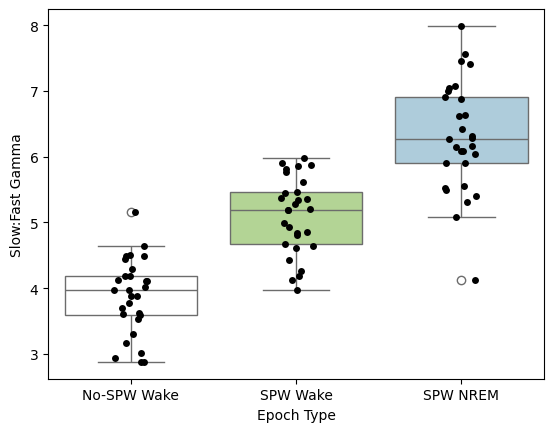

In [ ]:
order = ["No-SPW Wake", "SPW Wake", "SPW NREM"]
_df = sgfg_medians.loc[sgfg_medians["ROI"] == "CA1-slm"]
sns.boxplot(
    data=_df,
    x="Epoch Type",
    y="Slow:Fast Gamma",
    color="w",
    order=order,
    palette=tri_palette,
)
sns.stripplot(data=_df, x="Epoch Type", y="Slow:Fast Gamma", color="k", order=order)

# plt.savefig(nb.get_project_file('figures/sgfg_by_epoch_type.svg'), bbox_inches='tight')
# plt.savefig(nb.get_project_file('figures/sgfg_by_epoch_type.png'), dpi=600, bbox_inches='tight')

#### Fig. 4D

Text(0, 0.5, '')

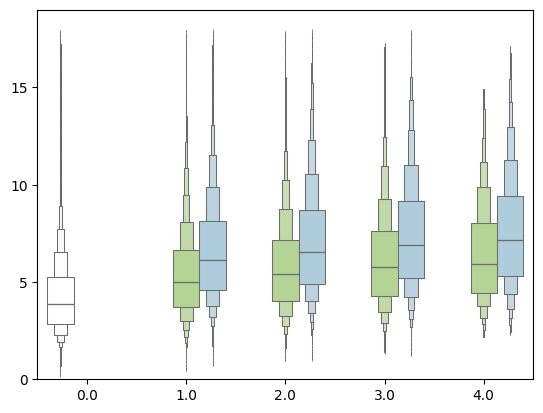

In [ ]:
# Note: This no longer reproduces the figure exactly, because of a change introduced in seaborn 0.13.0.
# Since the change, space is reserved on the x-axis for levels of the hue variable that are not represented in the data.
# The data are the same, so this is just a cosmetic issue.
_df = df.loc[is_slm & ~is_extreme_outlier]
g = sns.boxenplot(
    data=_df,
    x="Number of SPWs",
    y="Slow:Fast Gamma",
    hue_order=tri_palette.keys(),
    hue="Epoch Type",
    palette=tri_palette,
    showfliers=False,
)
# g = sns.boxenplot(data=_df, x="Number of SPWs", y='Slow:Fast Gamma', hue = "State", hue_order = ["Wake", "NREM"], palette=bi_palette, showfliers=False)
g.set(ylim=(0, 19))
g.legend_.remove()
plt.yticks([0, 5, 10, 15])
plt.xlabel(None)
plt.ylabel(None)

# plt.savefig(nb.get_project_file('figures/sgfg_by_nspw.svg'), bbox_inches='tight')
# plt.savefig(nb.get_project_file('figures/sgfg_by_nspw.png'), dpi=600, bbox_inches='tight')

### Extended Data Fig. 9

In [12]:
rois = ["CA1-so", "CA1-sp", "CA1-sr", "CA1-slm", "DG-dl-ml", "CA3"]

#### Extended Data Fig. 9A

Text(2506.4849537037035, 0.5, '')

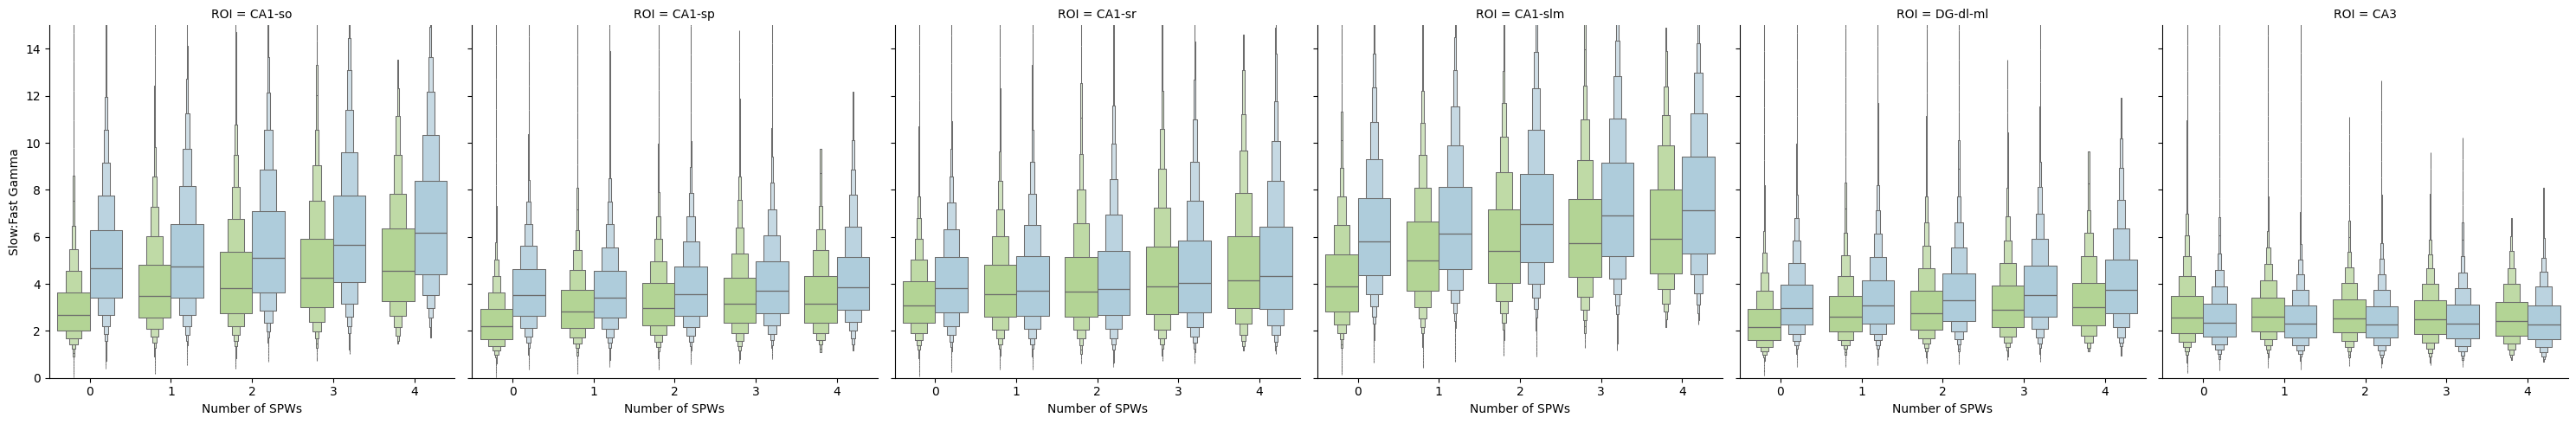

In [ ]:
g = sns.catplot(
    data=df[~is_extreme_outlier],
    x="Number of SPWs",
    y="Slow:Fast Gamma",
    hue="State",
    hue_order=["Wake", "NREM"],
    palette=bi_palette,
    col="ROI",
    col_order=rois,
    kind="boxen",
    showfliers=False,
    legend=False,
)
g.set(ylim=(0, 15))
plt.xticks([0, 1, 2, 3, 4], ["0", "1", "2", "3", "4"])
plt.xlabel(None)
plt.ylabel(None)

# plt.savefig(
#    nb.get_project_file(f"figures/AeryJones_sgfg_by_nspw_by_roi.svg"),
#    bbox_inches="tight",
# )
# plt.savefig(
#    nb.get_project_file(f"figures/AeryJones_sgfg_by_nspw_by_roi.png"),
#    dpi=600,
#    bbox_inches="tight",
# )

#### Extended Data Fig. 9B

Text(2506.4849537037035, 0.5, '')

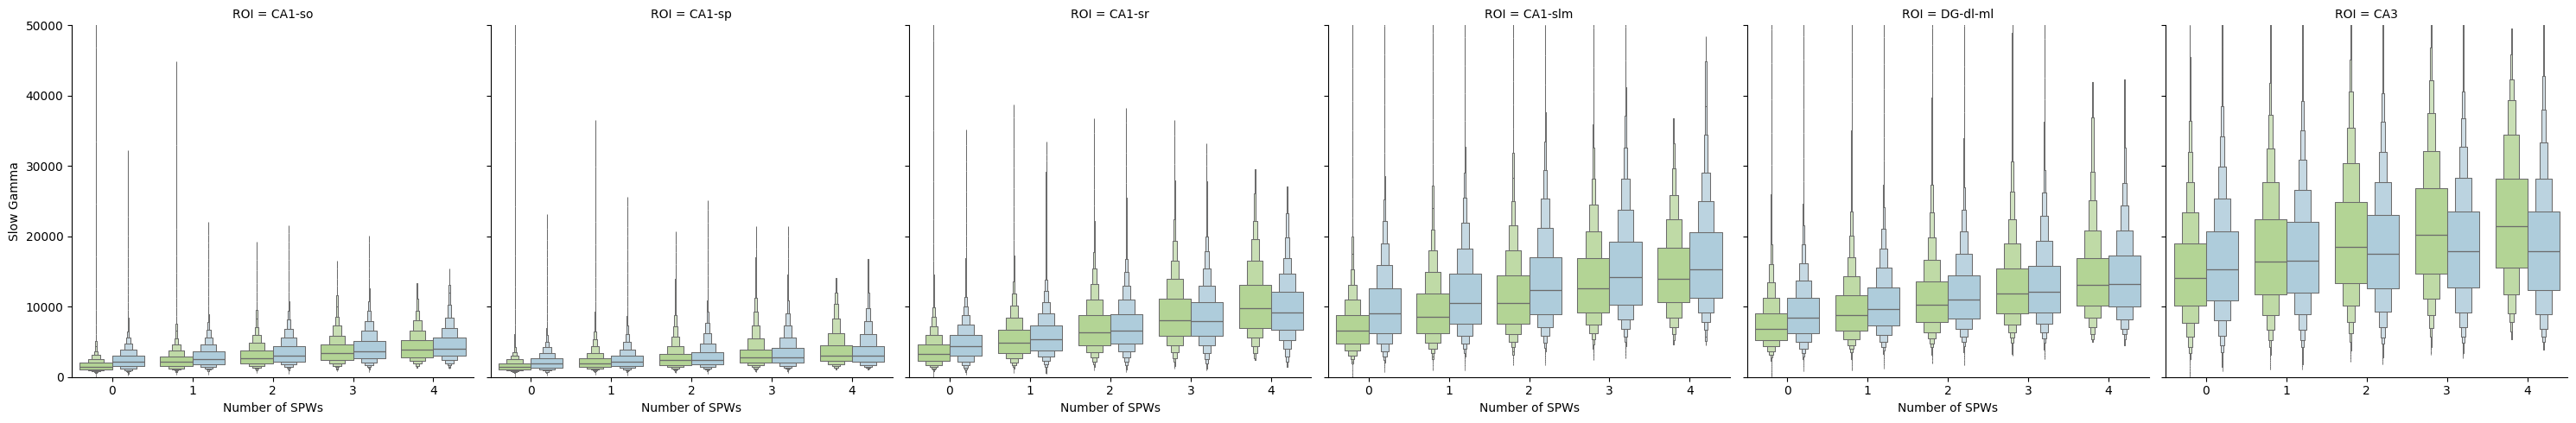

In [13]:
g = sns.catplot(
    data=df[~is_extreme_outlier],
    x="Number of SPWs",
    y="Slow Gamma",
    hue="State",
    hue_order=["Wake", "NREM"],
    palette=bi_palette,
    col="ROI",
    col_order=rois,
    kind="boxen",
    showfliers=False,
    legend=False,
)
g.set(ylim=(0, 50000))
plt.xticks([0, 1, 2, 3, 4], ["0", "1", "2", "3", "4"])
plt.xlabel(None)
plt.ylabel(None)

# plt.savefig(
#    nb.get_project_file(f"figures/AeryJones_sg_by_nspw_by_roi.svg"),
#    bbox_inches="tight",
# )
# plt.savefig(
#    nb.get_project_file(f"figures/AeryJones_sg_by_nspw_by_roi.png"),
#    dpi=600,
#    bbox_inches="tight",
# )

#### Extended Data Fig. 9C

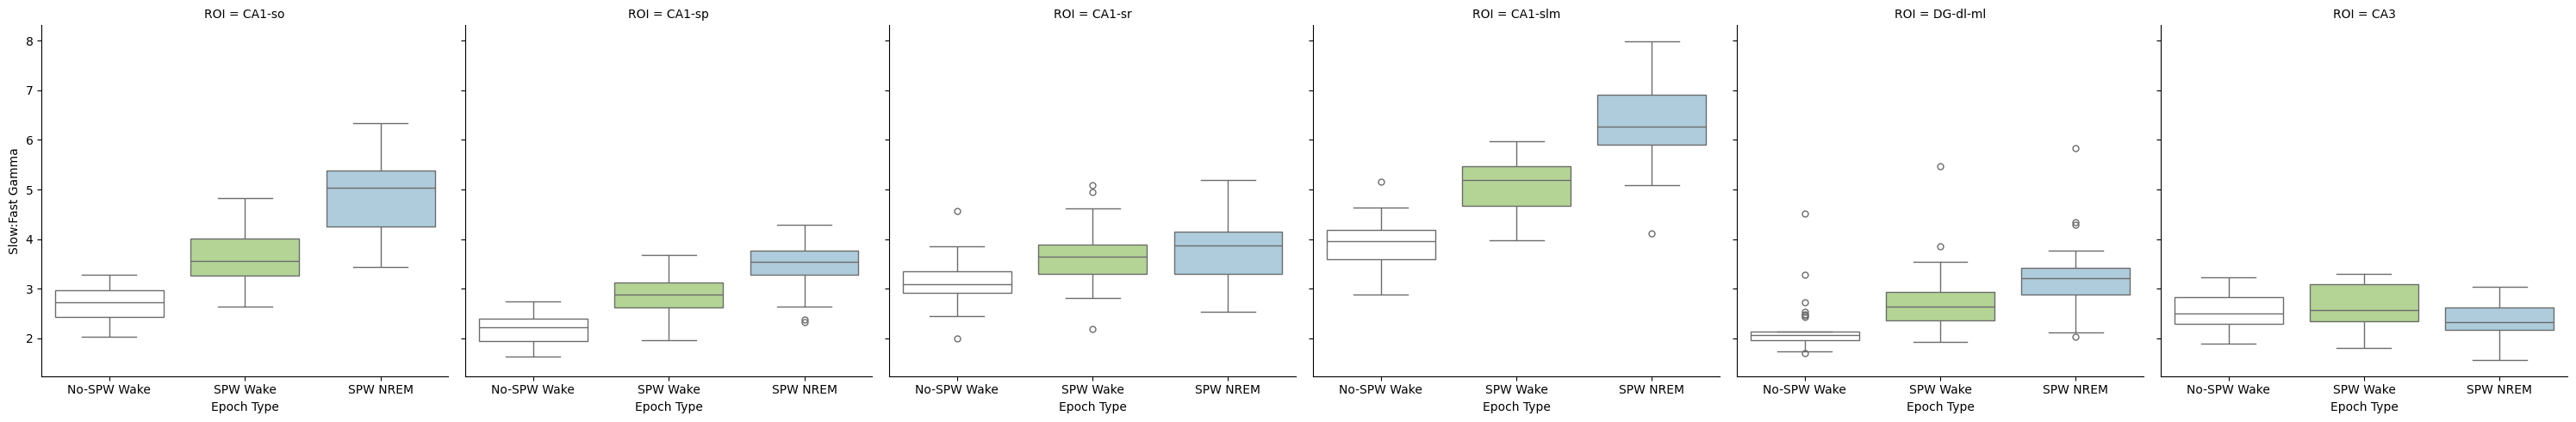

In [46]:
order = ["No-SPW Wake", "SPW Wake", "SPW NREM"]
sns.catplot(
    data=sgfg_medians,
    x="Epoch Type",
    y="Slow:Fast Gamma",
    hue="Epoch Type",
    order=order,
    hue_order=order,
    palette=tri_palette,
    col="ROI",
    col_order=rois,
    legend=False,
    kind="box",
)
# plt.savefig(
#    nb.get_project_file(f"figures/AeryJones_sgfg_by_epoch_type_by_roi.svg"),
#    bbox_inches="tight",
# )
# plt.savefig(
#    nb.get_project_file(f"figures/AeryJones_sgfg_by_epoch_type_by_roi.png"),
#    dpi=600,
#    bbox_inches="tight",
# )